# Домашняя работа

1. Попробуйте видоизменить параметры разобранной на уроке двухслойной нейронной сети таким образом, чтобы улучшить ее точность.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
X, y = load_digits(return_X_y=True)

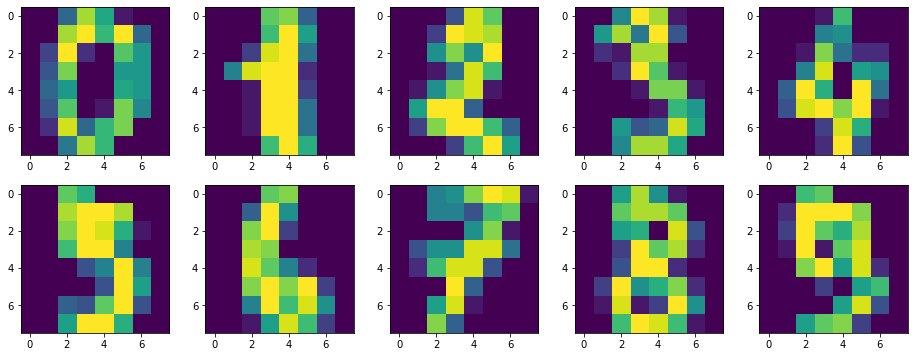

In [3]:
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i,:].reshape([8, 8]))

In [4]:
def to_one_hot(Y):
    n_col = np.max(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1
    return binarized

In [5]:
# формирование входных данных
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# формирование выходных данных(результатов)
y = y.flatten()
y = to_one_hot(y)
display(y, y.shape)

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

(1797, 10)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [7]:
from IPython.core.debugger import set_trace

In [8]:
from sklearn.base import BaseEstimator, TransformerMixin


class OneHiddenLayerNeuralNetClassification(BaseEstimator, TransformerMixin):
  
    def sigmoid(self, x): 
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_deriv(self, x):
        return self.sigmoid(x) * (1 - self.sigmoid(x))
    
    def relu(self, x):
        return np.where(x > 0, x, 0)
    
    def relu_deriv(self, x):
        return np.where(x >= 0, 1, 0)
  
    def __init__(self, hide_neuron_count, 
                activation_function_type='sigma',
                output_neuron_cout=10, 
                learning_rate=0.1, 
                num_epochs=100,
                random_seed=1,
                visualisation=True,
                epsilon=1e-5):
        self.hide_neuron_count = hide_neuron_count
        self.output_neuron_cout = output_neuron_cout
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.activation_function_type = activation_function_type

        if random_seed:
            np.random.seed(random_seed)

        self.train_errors = []
        self.train_metrics = []
        
        self.visualisation = visualisation
        
        self.w1 = None
        self.w0 = None
        
        self.epsilon = epsilon
        

    def get_activation_func_deriv(self, x):
        if self.activation_function_type == 'sigma':
            return self.sigmoid_deriv(x)
        
        if self.activation_function_type == 'relu':
            return self.relu_deriv(x)

    def get_activation_func(self, x):
        if self.activation_function_type == 'sigma':
            return self.sigmoid(x)
        
        if self.activation_function_type == 'relu':
            return self.relu(x)

    def fit(self, X, y):
        input_neural_count = X.shape[1]

        w0 = np.random.random((input_neural_count, self.hide_neuron_count))  
        w1 = np.random.random((self.hide_neuron_count, self.output_neuron_cout))

        for i in range(self.num_epochs):

            # прямое распространение(feed forward)
            layer0 = X
            # set_trace()
            layer1 = self.get_activation_func(np.dot(layer0, w0))
            layer2 = self.sigmoid(np.dot(layer1, w1))

            # обратное распространение (back propagation)
            # с использованием градиентного спуска
            layer2_error = layer2 - y  # производная функции потерь
            layer2_grad = layer2_error * self.sigmoid_deriv(layer2)
            
            layer1_error = layer2_grad.dot(w1.T)
            layer1_grad = layer1_error * self.get_activation_func_deriv(layer1)
            
            w1 -= layer1.T.dot(layer2_grad) * self.learning_rate
            w0 -= layer0.T.dot(layer1_grad) * self.learning_rate
            
            # ошибка модели
            error = np.mean(np.abs(layer2_error))
            self.train_errors.append(error)

            # метрики качества
            preds = np.argmax(layer2, axis=1)
            labels = np.argmax(y, axis=1)
            accuracy = (preds == labels).sum() * 100 / len(labels)
            self.train_metrics.append(accuracy)
            
            # if (len(self.train_metrics) > 2) and (np.abs(self.train_metrics[-2] - self.train_metrics[-1]) < self.epsilon):
            #     break
        
        self.w1 = w1
        self.w0 = w0

        if self.visualisation:

            plt.figure(figsize=(16, 5))
            plt.title(f'Last error is {error}')
            plt.plot(self.train_errors, c='orange')
            plt.xlabel('Обучение')
            plt.ylabel('Ошибка')
            plt.show()

            plt.figure(figsize=(16, 5))
            plt.title(f'Last accuracy is {accuracy}')
            plt.plot(self.train_metrics, c='green')
            plt.xlabel('Количество итераций')
            plt.ylabel('Accuracy')
            plt.show()
        
        return self.train_errors, self.train_metrics
    
    def predict(self, X):
        layer0 = X
        layer1 = self.get_activation_func(np.dot(layer0, self.w0))
        layer2 = self.sigmoid(np.dot(layer1, self.w1))
        
        return np.argmax(layer2, axis=1)

C:\Users\B7E3~1\AppData\Local\Temp/ipykernel_5600/402633029.py:7: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


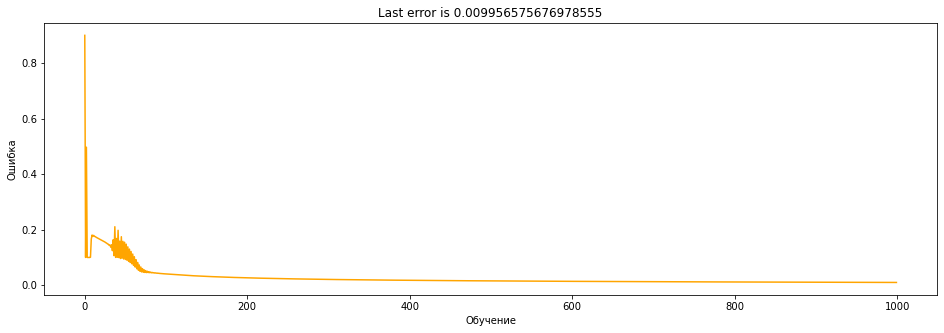

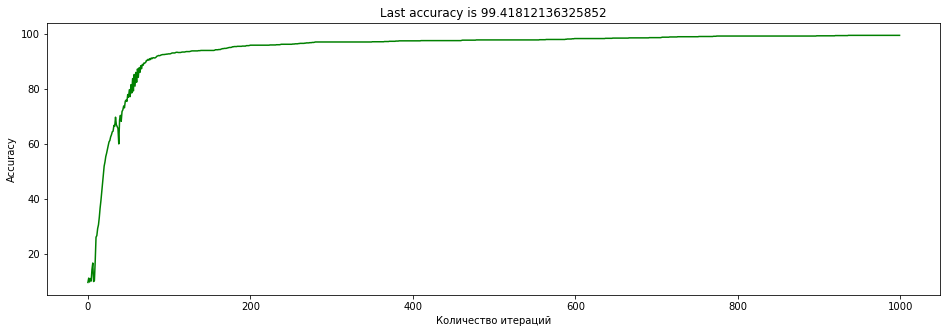

In [9]:
net = OneHiddenLayerNeuralNetClassification(hide_neuron_count=30, activation_function_type='relu', num_epochs=1000, learning_rate=.001)
# net = OneHiddenLayerNeuralNetClassification(hide_neuron_count=20, activation_function_type='sigma', num_epochs=5000, learning_rate=.001)
_ = net.fit(X_train, y_train)

In [10]:
preds_test = net.predict(X_test)
labels_test = np.argmax(y_test, axis=1)
accuracy_test = (preds_test == labels_test).sum() * 100 / len(labels_test)

print(f"accuracy на тесте {accuracy_test:.2f}%")

accuracy на тесте 96.30%


HyperOpt

In [ ]:
Best {'activation_function_type': 0, 'hide_neuron_count': 2, 'learning_rate': 2, 'num_epochs': 1}
Best {'activation_function_type': 0, 'hide_neuron_count': 1, 'learning_rate': 1, 'num_epochs': 0}

In [22]:
from hyperopt import tpe, hp, fmin, STATUS_OK, Trials

space = {
    'hide_neuron_count': hp.choice('hide_neuron_count', [65, 70, 75]), 
    'activation_function_type': hp.choice('activation_function_type', ['sigma', 'relu']), 
    'num_epochs': hp.choice('num_epochs', [500, 550, 600, 700]), 
    'learning_rate': hp.choice('learning_rate', [.01, .001, .02])
}

In [23]:
def hyperparametr_tuning(params):
    model = OneHiddenLayerNeuralNetClassification(**params, visualisation=False)

    model.fit(X_train, y_train)

    preds_test = model.predict(X_test)
    labels_test = np.argmax(y_test, axis=1)
    accuracy_test = (preds_test == labels_test).sum() * 100 / len(labels_test)
    
    return {'loss': -accuracy_test, 'status': STATUS_OK}

In [24]:
trial = Trials()

best = fmin(
    fn=hyperparametr_tuning,
    space=space,
    algo=tpe.suggest,
    max_evals=50,
    trials=trial
)

print(f'Best {best}')

  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]

C:\Users\B7E3~1\AppData\Local\Temp/ipykernel_5600/402633029.py:7: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))



 94%|█████████▍| 47/50 [02:10<00:08,  2.85s/trial, best loss: -96.96969696969697]

C:\Users\B7E3~1\AppData\Local\Temp/ipykernel_5600/402633029.py:82: RuntimeWarning: invalid value encountered in subtract
  w1 -= layer1.T.dot(layer2_grad) * self.learning_rate



100%|██████████| 50/50 [02:18<00:00,  2.76s/trial, best loss: -96.96969696969697]
Best {'activation_function_type': 0, 'hide_neuron_count': 1, 'learning_rate': 0, 'num_epochs': 2}


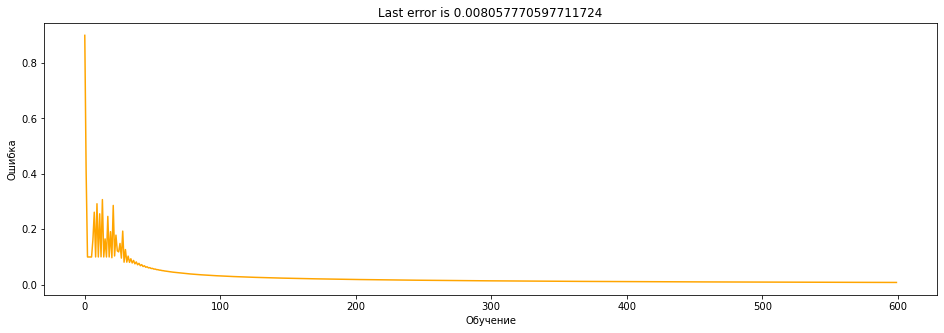

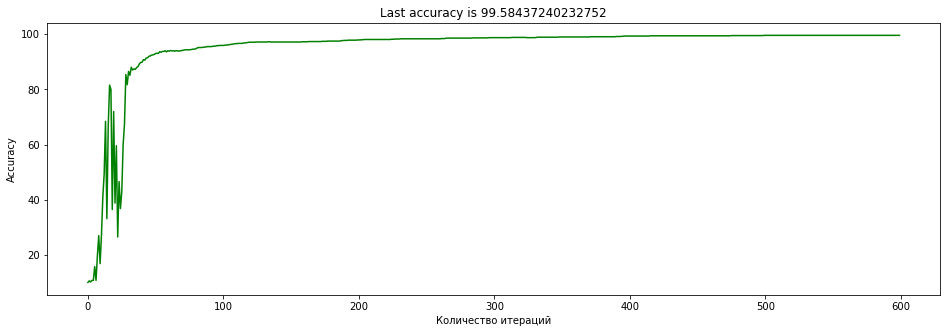

In [26]:
params = {'activation_function_type': 'sigma', 'hide_neuron_count': 70, 'learning_rate': .01, 'num_epochs': 600}

net = OneHiddenLayerNeuralNetClassification(**params)
net.fit(X_train, y_train);

2. Проведите анализ — что приводит к ухудшению точности нейронной сети?

К ухудщению точности нейронной сети приводит увеличение параметра learning_rate, уменьшнение количества нейронов в скрытом слое

3. Что приводит к увеличению ее точности?

К увеличению точности приводит: увеличение количество нейронов в скрытом слое, уменьшение скорости обучения, увеличение числа эпох 